# Note for grad engine

In [12]:
from micrograd.engine import Value
from graphviz import Digraph

In [13]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

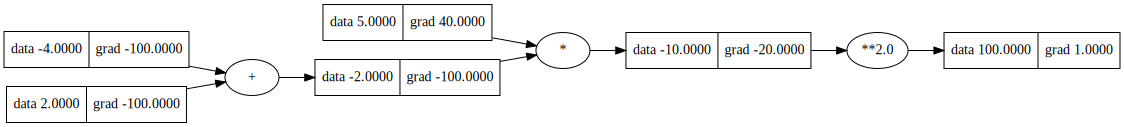

In [17]:
a = Value(-4.0)
b = Value(2.0)
d = Value(5.0)
e = 2.0

c = a + b
f = c * d
h = f ** e

h.backward()
draw_dot(h)

## How does backward work?
+ Construct computing graph using recursion stored in `topo`.
+ Call backward for each Value object. Admittedly, `backward()` computes the gradient of formula's inputs, like `a` and `b`.